# Тест. Практика проверки гипотез

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [45]:
from __future__ import division
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
n = 100
prob = 0.75
F_H0 = stats.binom(n, prob)

<Container object of 101 artists>

(60, 90)

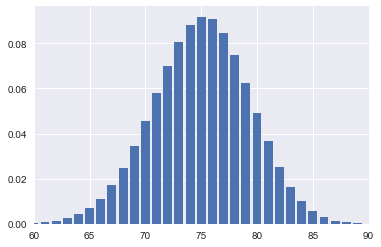

In [3]:
x = np.linspace(0,100,101)

plt.bar(x, F_H0.pmf(x), align = 'center')
plt.xlim(60, 90) 
plt.show()

In [4]:
print('p-value: %.4f' % stats.binom_test(67, 100, prob))

p-value: 0.0822


<b>

Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты.

In [5]:
print('p-value: %.10f' % stats.binom_test(22, 50, prob))

p-value: 0.0000034831


<b>

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

pines.txt

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [6]:
pines_data = pd.read_table('pines.txt')
pines_data.describe()
pines_data.head()

,sn,we
count,584.000000,584.000000
mean,98.735274,113.829281
std,56.523154,49.810725
min,0.000000,0.000000
25%,52.050000,79.125000
50%,101.450000,121.900000
75%,149.400000,149.725000
max,200.000000,200.000000


,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


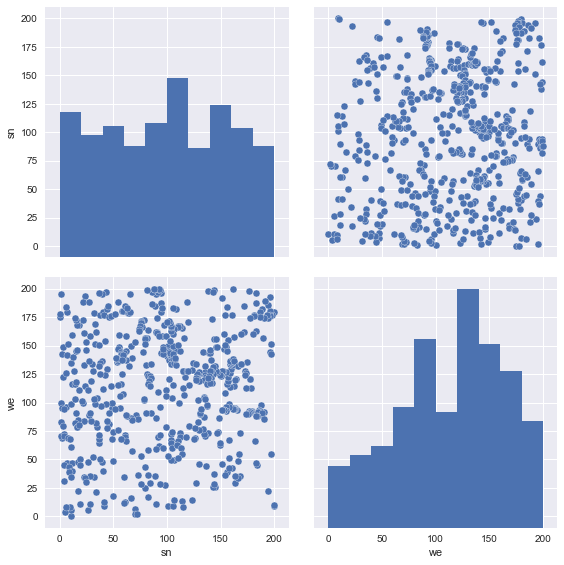

In [7]:
sns.pairplot(pines_data, size=4);

In [49]:
sn_num, we_num = 5, 5

trees_bins = stats.binned_statistic_2d(pines_data.sn, pines_data.we, None, statistic='count', bins=[sn_num, we_num])

trees_squares_num = trees_bins.statistic
trees_squares_num
trees_bins.x_edge
trees_bins.y_edge

array([[ 18.,  26.,  29.,  25.,  20.],
       [ 14.,  12.,  22.,  34.,  25.],
       [ 12.,  24.,  15.,  50.,  37.],
       [  8.,  19.,  31.,  50.,   7.],
       [  7.,   8.,  37.,  27.,  27.]])

array([   0.,   40.,   80.,  120.,  160.,  200.])

array([   0.,   40.,   80.,  120.,  160.,  200.])

In [51]:
mean_trees_num = np.sum(trees_squares_num) / 25
print(mean_trees_num)

23.36


<b>

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [97]:
stats.chisquare(trees_squares_num.flatten(), ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.5746697749672791e-20)